# Fund Separation Theorem and the Capital Market Line

- Capital Market Line: The shape of the efficient frontier in the presence of a risk-free asset
  - The EF dramatically changes shape when a RF asset is introduced
  - It becomes **a straight line**
- You have another asset with an expected return of $r_\text{rf}$ and $\sigma_\text{rf}=0$
  - There's a straight line starting from that point, with the maximum slope so that it still touches the efficient frontier.
  - That touching point is the **tangency portfolio** or **Maximum Sharpe Ratio (MSR) portfolio**
- The MSR portfolio has two nice advantages:
    1. It's the portfolio with the highest possible Sharpe Ratio, i.e. highest excess return per unit of risk
        - But it's not god-given that this is what you want to optimize! Maybe you have 3 decades of time and just want maximum return
    2. It contains *no* exposure to specific unrewarded risk. It contains only systematic risk.
        - Specific risk is not rewarded because it can be diversified
        
        
**Conclusion: All investors should hold a combination of the risk-free asset and the MSR portfolio**

# Finding the MSR portfolio

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

import sys
sys.path.append('..')
import edhec_risk_kit as erk

In [2]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
# TODO: The covariance matrix is not annualized, though!
cov = ind["1996":"2000"].cov()

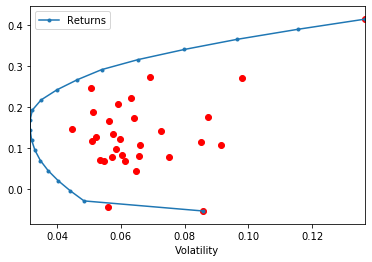

In [3]:
erk.plot_ef(20, er, cov)

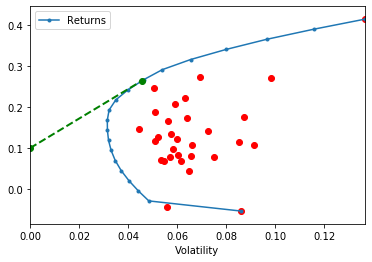

In [4]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.10)

**New insight**

- Earlier you held portfolios on the upper part of the blue line.
- Now you hold portfolios on the green line. **It has lower vol for a given return if it's to the left of the blue line, and a higher return for a given vol if it's above the blue line!**
    - That is, you'll hold portfolios on the green line *or* the blue part above it if you want higher return
    - When shorting is allowed, you can actually continue the green line above, and short riskfree to buy the MSP and achieve higher returns!

# Parameter uncertainty

- The key challenge in portfolio optimization is **estimation error**
  - i.e. expected return and volatility
- Expected return is very noisy and much harder to estimate correctly than the covariance
- So there is a popular portfolio that does not depend on return estimates at all:
  - The **Global Minimum Variance** (GMV) portfolio
  - Many investment managers focus on that one
  - It's much less sensitive to estimation errors than the MSP portfolio

# Lack of Robustness of the Markowitz Procedure, and the GMV

**TODO**: You could simulate wobbling the expected returns a bit and show the effect on the MSR portfolio and its weights (will be high). *THEN* compare it to the effects on the GMV or equal-weighted portfolio (will be lower or nonexistent)

In [5]:
l = ['Food', 'Steel']

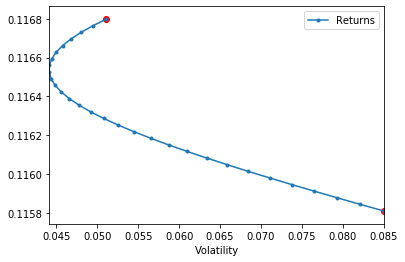

In [6]:
erk.plot_ef(30, er[l], cov.loc[l,l])

In [7]:
erk.msr(0.1, er[l], cov.loc[l,l])

array([0.75040362, 0.24959638])

Changing the expected returns slightly has a large effect on the MSR portfolio's weights

In [8]:
erk.msr(0.1, np.array([0.13, 0.10]), cov.loc[l,l])

array([1., 0.])

### You can avoid dealing with expected returns by

1. Equal-weighting every asset (naive diversification)
2. Computing the GMV portfolio

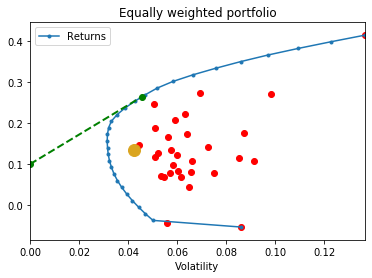

In [9]:
ax = erk.plot_ef(30, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True)
_ = ax.set_title('Equally weighted portfolio')

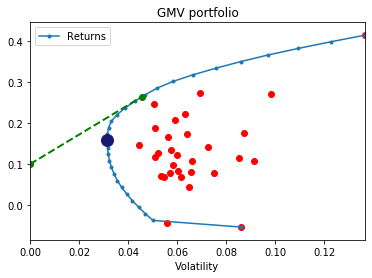

In [10]:
ax = erk.plot_ef(30, er, cov, show_cml=True, riskfree_rate=0.1, show_gmv=True)
_ = ax.set_title('GMV portfolio')